In [1]:
%pip install -U sentence-transformers

  Attempting uninstall: sentence-transformers
    Found existing installation: sentence-transformers 3.4.1
    Uninstalling sentence-transformers-3.4.1:
      Successfully uninstalled sentence-transformers-3.4.1

[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip3.13 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

from sentence_transformers import SentenceTransformer

import pandas as pd
import matplotlib.pyplot as plt

In [3]:
convs = pd.read_csv(
    'stjohns.csv',
    dtype=dict(answer_type=str),
    # User questions don't have an answer_type
    usecols=lambda n: n != 'answer_type')

convs = convs[convs['author'] == 'USER']
convs.shape

(1085, 8)

In [5]:
model = SentenceTransformer("all-MiniLM-L6-v2")
model

SentenceTransformer(
  (0): Transformer({'max_seq_length': 256, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 384, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
  (2): Normalize()
)

In [5]:
contents = list(convs['content'].unique());

In [6]:
embeddings = model.encode(contents)
embeddings.shape

(65, 384)

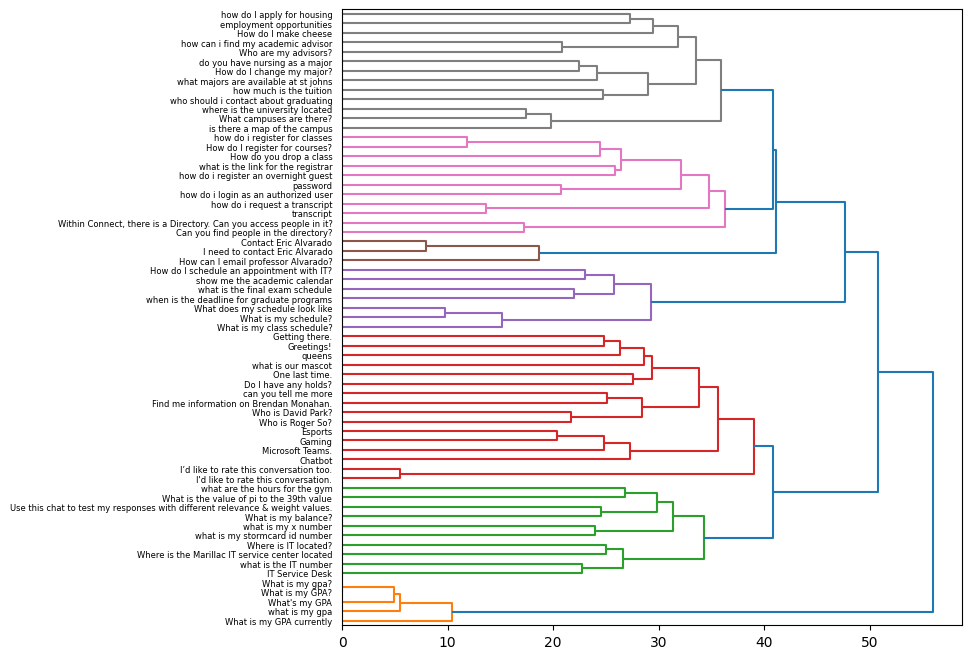

In [7]:
scaler = StandardScaler()
scaled_embeddings = scaler.fit_transform(embeddings)
link = linkage(scaled_embeddings, method='ward')
plt.figure(figsize=(8,8))
R=dendrogram(link, p=10, orientation="right",labels=contents,truncate_mode='level', count_sort=True,distance_sort=True);

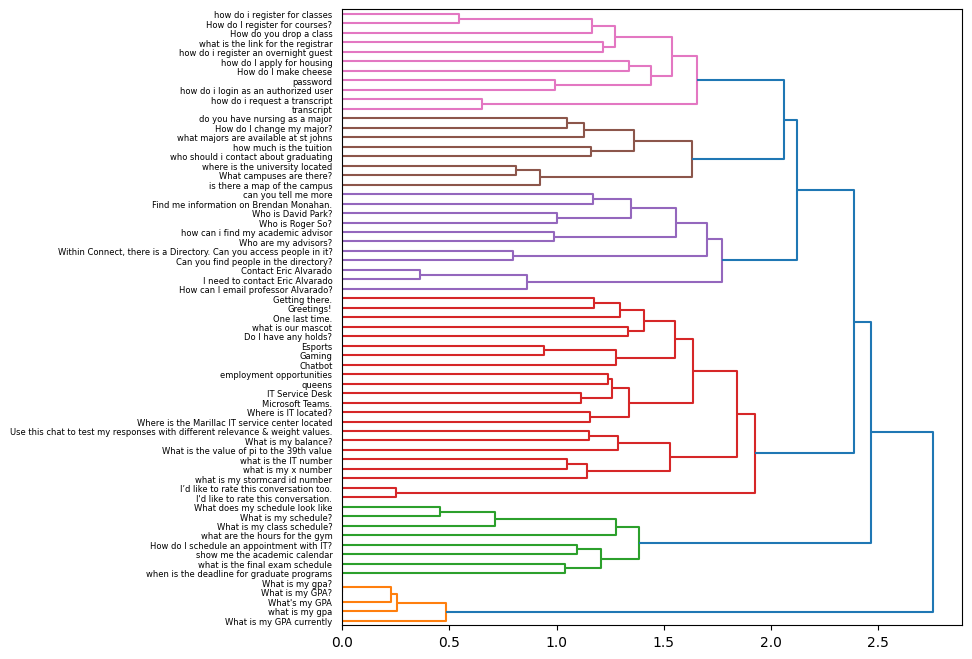

In [8]:
link = linkage(embeddings, method='ward')
plt.figure(figsize=(8,8))
R=dendrogram(link, orientation="right",labels=contents, count_sort=True,distance_sort=True);

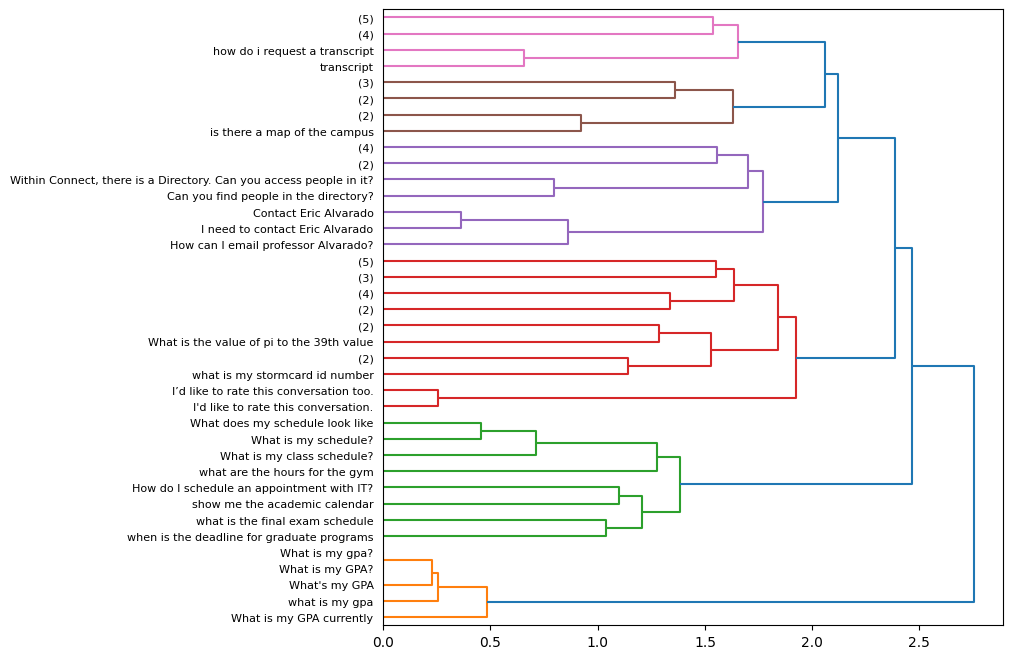

In [9]:
plt.figure(figsize=(8,8))
plt.axvline(9, color='k', ls='--');
R=dendrogram(link, p=6, truncate_mode='level', orientation="right",labels=contents, count_sort=True,distance_sort=True);

In [10]:
flat=fcluster(link, 1.75,criterion='distance')
flat

array([1, 1, 7, 5, 4, 2, 2, 3, 3, 5, 5, 4, 5, 7, 7, 7, 6, 7, 8, 1, 9, 4,
       6, 6, 5, 5, 5, 1, 5, 2, 2, 8, 8, 7, 9, 1, 5, 5, 9, 8, 7, 9, 5, 9,
       2, 9, 5, 9, 2, 8, 4, 4, 8, 8, 4, 5, 2, 9, 8, 9, 9, 9, 5, 7, 2],
      dtype=int32)

In [11]:
clustering_model = AgglomerativeClustering(
    n_clusters=None, distance_threshold=1.5, 
)  # , affinity='cosine', linkage='average', distance_threshold=0.4)
clustering_model.fit(embeddings)
cluster_assignment = clustering_model.labels_

In [12]:
clustered_sentences = {}
for sentence_id, cluster_id in enumerate(cluster_assignment):
    if cluster_id not in clustered_sentences:
        clustered_sentences[cluster_id] = []

    clustered_sentences[cluster_id].append(contents[sentence_id])

for i, cluster in clustered_sentences.items():
    print("Cluster ", i + 1)
    print(cluster)
    print("")

Cluster  16
['What is my GPA?', 'What is my gpa?', 'what is my gpa', 'What is my GPA currently', "What's my GPA"]

Cluster  15
['Who are my advisors?', 'how can i find my academic advisor']

Cluster  2
['Do I have any holds?', 'Greetings!', 'Getting there.', 'One last time.', 'what is our mascot']

Cluster  4
['What is my balance?', 'Use this chat to test my responses with different relevance & weight values.', 'What is the value of pi to the 39th value']

Cluster  3
['What is my class schedule?', 'What is my schedule?', 'What does my schedule look like', 'show me the academic calendar', 'what are the hours for the gym', 'when is the deadline for graduate programs', 'what is the final exam schedule', 'How do I schedule an appointment with IT?']

Cluster  14
["I'd like to rate this conversation.", 'I’d like to rate this conversation too.']

Cluster  10
['Can you find people in the directory?', 'Within Connect, there is a Directory. Can you access people in it?']

Cluster  6
['Find me in